In [13]:
import math
import numpy as np
import astropy.cosmology
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from astropy.cosmology import Planck18
import matplotlib.pyplot as plt

In [14]:
# constants
# LRG_z_max = 1.6979 (outlier)
# LRG_z_min = -0.0023
# BGS_z_max = 1.6979 (outlier)
# BGS_z_min = -0.0043
LRG_z_mean = 0.6851
LRG_z_max = 1.25
BGS_z_mean = 0.2516
BGS_z_max = 0.7
apature_d = 1.5 # in arcseconds

In [15]:
def vary_angular_sep(z_mean,z_max):
    R_s = 70 * (u.kpc)
    # distances
    d_l_mean = Planck18.angular_diameter_distance(z_mean)
    d_l_max = Planck18.angular_diameter_distance(z_max)
    # angular separation for BGS/LOA based on skyfiber to galaxy center distance plots
    # find r values
    if (z_mean == LRG_z_mean ):
        theta_LRG = np.linspace(0.0007909274985968819*4.8481e-6, 0.005555543236270858*4.8481e-6,10000000)
        r_mean = d_l_mean* np.tan(theta_LRG)
        r_max = d_l_max* np.tan(theta_LRG)
    else:
        theta_BGS = np.linspace(0.0011956075825011979*4.8481e-6, 0.005555551126463086*4.8481e-6,10000000)
        r_mean = d_l_mean* np.tan(theta_BGS)
        r_max = d_l_max* np.tan(theta_BGS)

    # ρ_mean/ρ_0
    ratio_mean = r_mean/ (R_s.to(u.Mpc) )
    ρ_mean = 1/(ratio_mean * (1+ratio_mean)**2)

    # ρ_max/ρ_0
    ratio_max = r_max/(R_s.to(u.Mpc) )
    ρ_max = 1/(ratio_max * (1+ratio_max)**2)
    
    # plot mean
    plt.plot(np.log10(ρ_mean),np.log10(ratio_mean))
    plt.xlabel(r'$log(r_{mean} / R_s)$')
    plt.ylabel(r'$log(ρ_{mean} / ρ_{0})$')
    if (z_mean == LRG_z_mean ):
        plt.title(r'LRG NFW Density Profile for $R_s$' f'={R_s}')
    else:
        plt.title(r'BGS NFW Density Profile for $R_s$' f'={R_s}')
    plt.grid(True)
    plt.show()
    # plot max
    plt.plot(np.log10(ρ_max),np.log10(ratio_max))
    plt.xlabel(r'$log(r_{max} / R_s)$')
    plt.ylabel(r'$log(ρ_{max} / ρ_{0})$')
    if (z_mean == LRG_z_mean ):
        plt.title(r'LRG NFW Density Profile for $R_s$' f'={R_s}')
    else:
        plt.title(r'BGS NFW Density Profile for $R_s$' f'={R_s}')
    plt.grid(True)
    plt.show()

    # plot ratio (mean/max)
    plt.plot(ρ_mean/ρ_max,r_mean/r_max)
    plt.xlabel(r'$(r_{mean} / r_{max})$')
    plt.ylabel(r'$(ρ_{mean} / ρ_{max})$')
    if (z_mean == LRG_z_mean ):
        plt.title(r'LRG NFW Density Ratio for $R_s$' f'={R_s}')
    else:
        plt.title(r'BGS NFW Density Ratio for $R_s$' f'={R_s}')
    plt.grid(True)
    plt.show()

    return ρ_mean, r_mean, ρ_max,r_max

LRG:


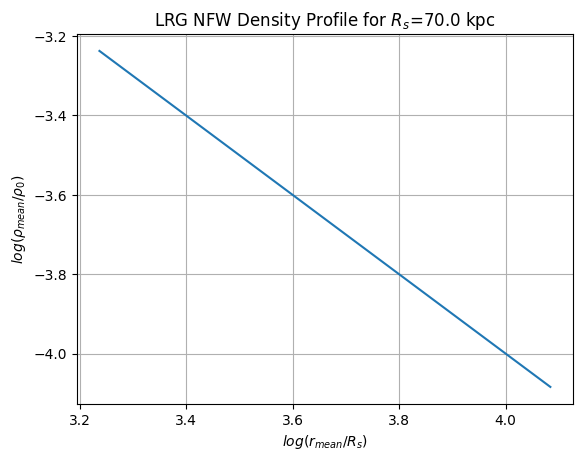

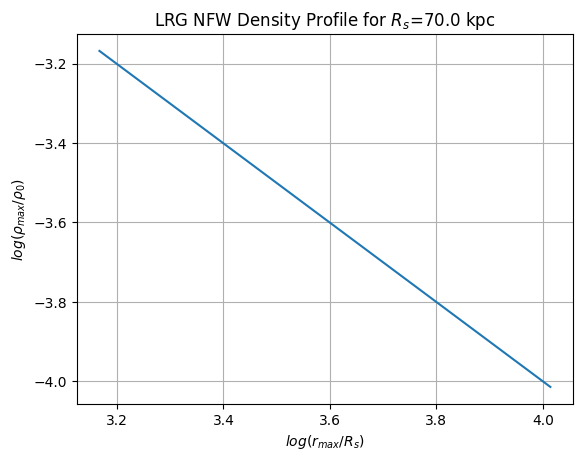

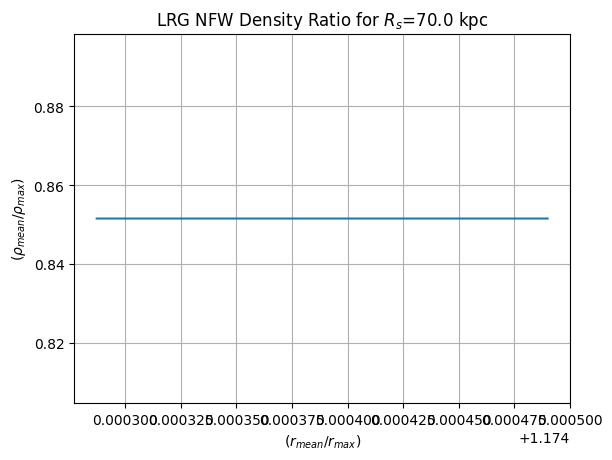

BGS:


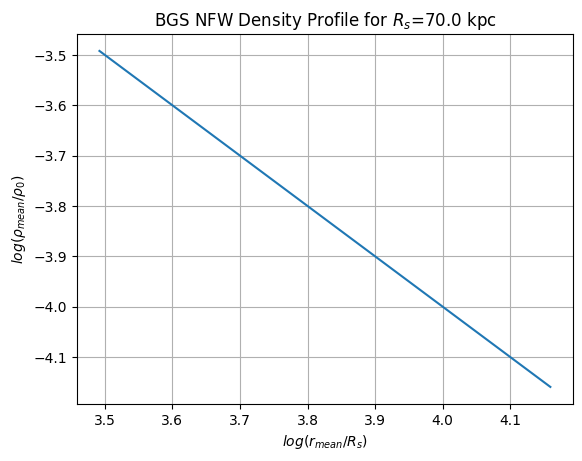

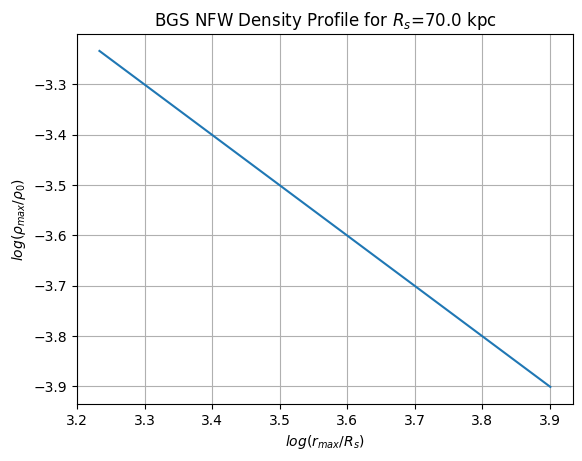

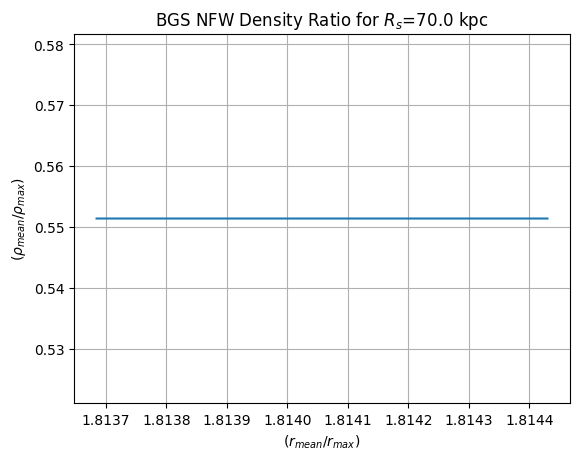

In [16]:
print("LRG:")
LRG_ρ_mean, LRG_r_mean, LRG_ρ_max, LRG_r_max = vary_angular_sep(LRG_z_mean,LRG_z_max)
print("BGS:")
BGS_ρ_mean, BGS_r_mean, BGS_ρ_max, BGS_r_max = vary_angular_sep(BGS_z_mean,BGS_z_max)